## Visualization with Word Clouds

**Word Clouds** (also known as wordle, word collage or tag cloud) are visual representations of words that give greater prominence to words that appear more frequently. This type of visualization can help presenters to quickly collect data from their audience, highlight the most common answers and present the data in a way that everyone can understand.

In my particular case I wanted to see the difference of visualization between negative and positive Tweets

# Importing necessary libraries
<a id='1. Sentiment Analysis'></a>

In [1]:
import numpy as np 
import pandas as pd 

# text processing libraries
from nltk.corpus import stopwords

# suppress warnings 
import warnings
warnings.filterwarnings('ignore')


# Loading datasets

In [6]:
df_ = pd.read_csv('/Users/yuliyahilevich/Desktop/Data Science All Women/Final_p/notebook/300000_nlp.csv',lineterminator='\n')

In [7]:
df = df_[['Text','sentiment_compound']]

In [8]:
df.head()

,Text,sentiment_compound
0,Lady in the Homebush vax queue reading the Art...,-0.4588
1,Health officials have approved a nationwide Co...,0.4215
2,Coronavirus Peru: covid-19 vaccination and lat...,0.0000
3,what's changed is that the most vulnerable are...,0.2508
4,Check out: Kaspersky at MWC: Industrial Cybera...,0.3400


Defining smaller functions for better reusability later

In [9]:
#first round of text cleaning 
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,
    remove links,remove punctuation
    and remove words containing numbers.'''
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) #remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove urls, https
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text) #get rid of digits, ie numbers
    return text

In [10]:
#let's get rid of the stopwords as they wont help us with visualisation
def remove_stopwords(text):
    """
    Removing stopwords belonging to english language
    """
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [11]:
# combining text after preprocessing, the text format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into 
    one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

## WORDCLOUD

In [12]:
# Import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

In [13]:
positive_tweets = df.loc[df.sentiment_compound >= 0.75]['Text']

In [14]:
#loading the mask
smile = np.array(Image.open('../notebook/bird.jpg'))

(-0.5, 1067.5, 897.5, -0.5)

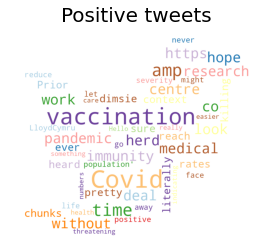

In [15]:
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white",
                      width= 500, height = 500,mask=smile,stopwords = stopwords.words('english')).generate(str(positive_tweets.values))
plt.title("Positive tweets", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'Paired' , random_state=17), alpha=0.98)
plt.axis('off')

### Updating stop_words

It's obvious that the most frequent words will be Covid, Vaccination and etc. I want to get rid of them in order to visualize the 'mood' of positive comments.

In [16]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Update the stopword list:
stop_words.update(['vaccination','covid'])

In [18]:
list_words = ['vaccinated','Covid','covid','covidvaccination','amp','co','https','vaccination','vaccine']

**Getting it all together** - A Text Preprocessing Function

This concludes the pre-processing part. It will be prudent to convert all the steps undertaken into a function for better reusability.

In [19]:
# text preprocessing function
def text_preprocessing_updated(text, list_words):
    
    #Data cleaning on the text variable
    nopunc = clean_text(text)
    
    # Tokenize the cleaned_text
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    
    # Remove punctuations and stopwords
    nopunc = tokenizer.tokenize(nopunc)
    
    # Update the stop_words

    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(list_words)
    remove_stopwords = [w for w in nopunc if w not in stop_words]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250056 entries, 0 to 250055
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Text                250056 non-null  object 
 1   sentiment_compound  250056 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.8+ MB


In [24]:
df['WordCloud'] = df['Text'].apply(lambda x : text_preprocessing_updated(x, list_words))

In [25]:
positive_tweets = df.loc[df.sentiment_compound >= 0.75]['WordCloud']


(-0.5, 1067.5, 897.5, -0.5)

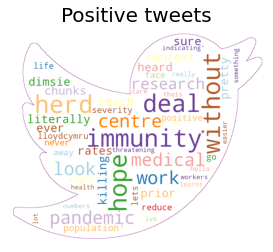

In [26]:
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white",
                      width= 500, height = 500,mask=smile,contour_color='purple',contour_width=0.5,stopwords = stopwords.words('english')).generate(str(positive_tweets.values))
plt.title("Positive tweets", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'Paired' , random_state=17), alpha=0.98)
plt.axis('off')

In [27]:
negative_tweets = df.loc[df.sentiment_compound <0]['Text']
negative_tweets.shape

(68118,)

In [28]:
smile = np.array(Image.open('../notebook/bird_n.jpg'))

In [29]:
#contour_color='black',contour_width=1

(-0.5, 1229.5, 1003.5, -0.5)

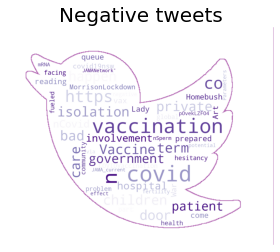

In [30]:
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white",
                      width= 500, height = 500,mask=smile,stopwords = stopwords.words('english'),contour_color='purple',contour_width=0.5).generate(str(negative_tweets.values))
plt.title("Negative tweets", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'Purples' , random_state=17), alpha=0.98)
plt.axis('off')

### Updating stop_words!

In [31]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Update the stopword list:
stop_words.update(['vaccination','covid'])

In [32]:
list_words = ['vaccination','Covid','covidvaccination','amp','hope''https','covid','n']

In [33]:
# text preprocessing function
def text_preprocessing_updated(text, list_words):
    """
    Cleaning and parsing the text.
    """
  # 1. Data cleaning on the text variable
    nopunc = clean_text(text)
    
    # 2. Tokenize the cleaned_text
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    
    # 3. Remove punctuations and stopwords
    nopunc = tokenizer.tokenize(nopunc)
    
    # 4. Update the stop_words

    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(list_words)
    remove_stopwords = [w for w in nopunc if w not in stop_words]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

In [35]:
df['WordCloud'] = df['Text'].apply(lambda x : text_preprocessing_updated(x, list_words))

In [36]:
negative_tweets = df.loc[df.sentiment_compound >= 0]['WordCloud']

(-0.5, 1229.5, 1003.5, -0.5)

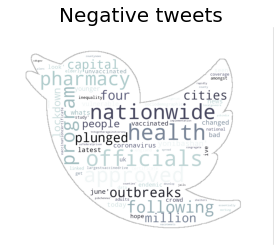

In [37]:
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",
                      width= 500, height = 500,mask=smile,contour_color='grey',contour_width=0.5,stopwords = stopwords.words('english')).generate(str(negative_tweets.values))
plt.title("Negative tweets", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'bone' , random_state=17), alpha=0.98)
plt.axis('off')